In [37]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import sys

# Questão 1)

imagem lida


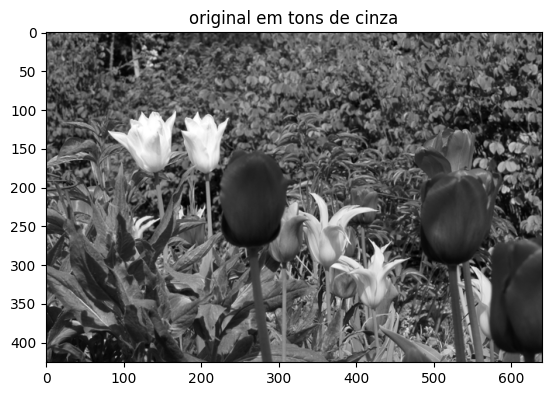

In [38]:
img_gray = cv.imread('flowers4.png', cv.IMREAD_GRAYSCALE)

if img_gray is None:
    print("nao foi possivel ler a imagem")
else:
    print("imagem lida")

img_double = img_gray.astype(np.float64)

plt.imshow(img_double, cmap='gray')
plt.title("original em tons de cinza")
plt.show()

# Questão 2)

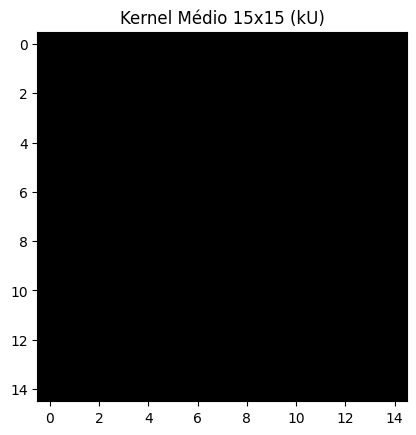

In [39]:
tamanho_kernel_medio = 15

kU = np.ones((tamanho_kernel_medio, tamanho_kernel_medio))#criia um kernel 15x15 de uns
kU = kU / np.sum(kU) # (1/225)

#ploto o kernel kU
plt.imshow(kU, cmap='gray')
plt.title("Kernel Médio 15x15 (kU)")
plt.show()

# Questão 3)

In [40]:
#cv.filter2D é a função de convolução equivalente a inconv
#ddepth = -1 significa que a saída terá o mesmo tipo da entrada
imU = cv.filter2D(img_double, -1, kU)

print("\n---")
print("Passo 3: Kernel kU aplicado. Imagem 'imU' gerada.")


---
Passo 3: Kernel kU aplicado. Imagem 'imU' gerada.


# Questão 4)


---
Passo 4: Kernel Gaussiano kG (shape=(17, 17)) criado.
Soma total do kG: 0.9999999999999997


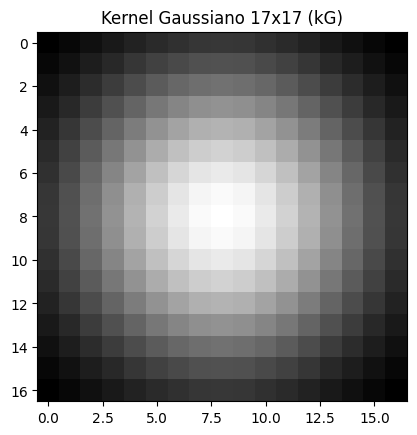

In [41]:
sigma = 5
meia_largura = 8
tamanho_kernel_gauss = (meia_largura * 2) + 1  # 8*2 + 1 = 17

#gero um kernel 1D
kG_1D = cv.getGaussianKernel(ksize=tamanho_kernel_gauss, sigma=sigma)

#para o 2d eu faco a multiplicacao de matriz
kG = kG_1D * kG_1D.T

print("\n---")
print(f"Passo 4: Kernel Gaussiano kG (shape={kG.shape}) criado.")
print(f"Soma total do kG: {np.sum(kG)}")
plt.imshow(kG, cmap='gray')
plt.title("Kernel Gaussiano 17x17 (kG)")
plt.show()

# Questão 5)

In [42]:
imG = cv.filter2D(img_double, -1, kG)
print("\n---")
print("passo 5: Kernel kG aplicado. Imagem 'imG' gerada.")


---
passo 5: Kernel kG aplicado. Imagem 'imG' gerada.


# Questão 6)

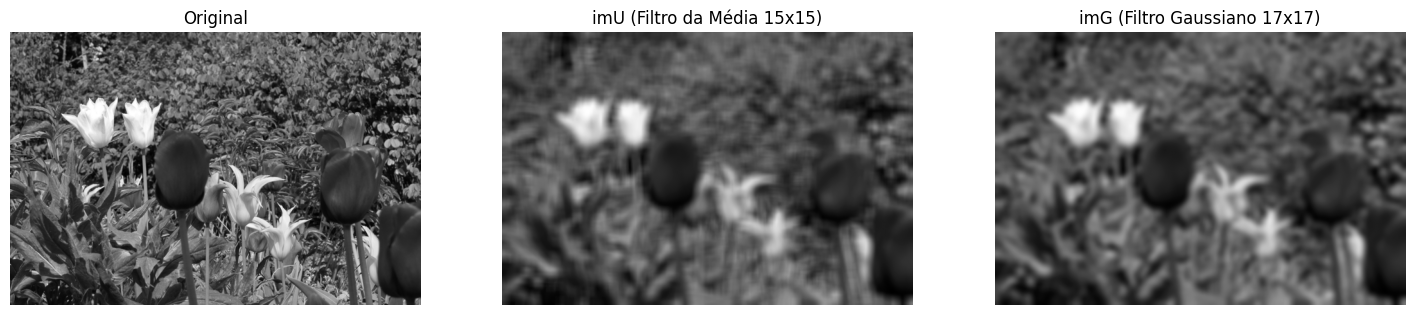

In [43]:

imU_vis = np.clip(imU, 0, 255).astype(np.uint8)
imG_vis = np.clip(imG, 0, 255).astype(np.uint8)

fig, ax = plt.subplots(1, 3, figsize=(18, 7))

ax[0].imshow(img_gray, cmap='gray')
ax[0].set_title("Original")
ax[0].axis('off')

ax[1].imshow(imU_vis, cmap='gray')
ax[1].set_title("imU (Filtro da Média 15x15)")
ax[1].axis('off')

ax[2].imshow(imG_vis, cmap='gray')
ax[2].set_title("imG (Filtro Gaussiano 17x17)")
ax[2].axis('off')

plt.show()

O Kernel Gaussiano, usado na imagem imG, cria um desfoque muito mais suave e natural. É por isso que a imG não possui as linhas e colunas embaçadas (artefatos) que vemos no fundo da imagem imU."